 # Tensorflow  DNNClassifier


We'll use the [Bank Authentication Data Set](https://www.kaggle.com/aariyan101/bank-notes/kernels) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [53]:
import pandas as pd


In [54]:
df=pd.read_csv("Loan1.csv")

** Check the head of the Data **

In [55]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [56]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

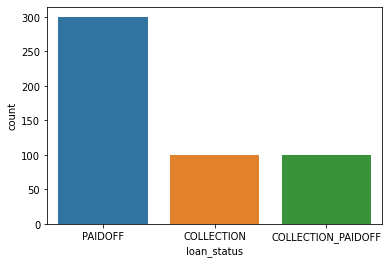

In [57]:
sns.countplot(data=df,x="loan_status")

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


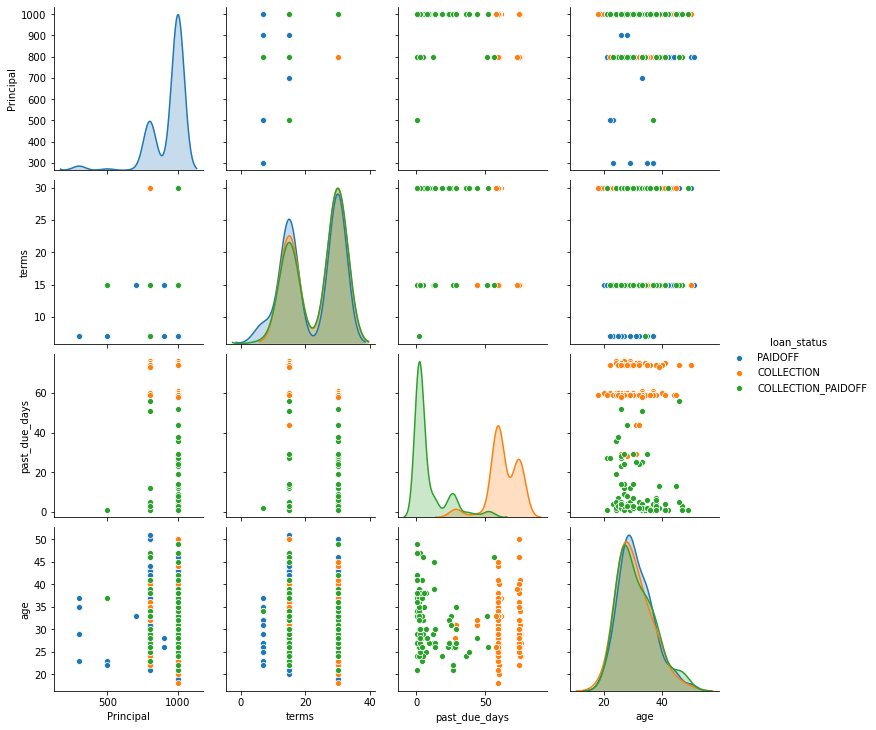

In [58]:
sns.pairplot(data=df,hue="loan_status")

In [59]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [60]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [61]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [62]:
df.loan_status.unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [63]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education',
       'Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)


In [64]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,471,2,5,2,5,6,9/14/2016 19:31,NaN,27,1,1
1,473,2,5,2,5,6,10/7/2016 9:00,NaN,31,0,0
2,4,2,5,2,5,6,9/25/2016 16:58,NaN,15,0,0
3,5,2,5,1,5,18,9/22/2016 20:00,NaN,9,3,1
4,6,2,5,2,6,7,9/23/2016 21:36,NaN,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...
495,464,1,5,2,2,1,10/14/2016 19:08,3.0,10,1,1
496,465,1,5,1,2,22,10/10/2016 20:02,14.0,8,1,1
497,466,1,3,1,2,22,9/29/2016 11:49,3.0,12,3,1
498,467,1,5,2,2,9,11/11/2016 22:40,1.0,20,3,0


In [65]:
df.loan_status.unique()

array(['2', '0', '1'], dtype=object)

In [66]:
X=df[['Loan_ID','Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education',
       'Gender']]

In [67]:
y=df['loan_status']

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [32]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [33]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [34]:
scaler.fit(df1.drop("loan_status",axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [35]:
scaled_fea = scaler.fit_transform(df1.drop("loan_status",axis=1))

In [37]:
scaled_fea

array([[-1.68017329,  0.48705679,  0.80115419,  2.14285714,  1.48504998,
        -1.71481604, -0.66979669, -0.88373642,  0.92814166,  0.40347329],
       [-1.64553055,  0.48705679, -1.15288042,  2.14285714,  0.23289991,
         0.98731833, -0.36465014, -0.53852688,  0.92814166,  0.40347329],
       [ 1.4723168 ,  0.48705679,  0.80115419,  2.14285714, -0.51839013,
         0.29446336,  0.70336281,  1.36012558,  0.92814166,  0.40347329],
       [-1.6108878 ,  0.48705679, -1.15288042,  2.14285714,  0.23289991,
         1.36838856, -0.21207686, -0.36592211, -1.84243046,  0.40347329],
       [ 1.43767406, -1.83226125, -1.15288042,  2.14285714,  0.23289991,
         0.88339008, -0.51722341,  0.32449697, -0.4571444 ,  0.40347329],
       [-1.57624505,  0.48705679,  0.80115419, -2.14285714,  1.73547999,
        -0.36374886,  0.55078954, -0.71113165,  0.92814166,  0.40347329],
       [-1.5416023 , -1.83226125, -1.15288042, -2.14285714,  0.48332993,
         0.81410459, -0.66979669,  0.49710174

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [36]:
df_1=pd.DataFrame(scaled_fea,columns=df1["loan_status"])
df_1.head()

ValueError: Shape of passed values is (100, 10), indices imply (100, 100)

## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [ ]:
X=df_1

In [ ]:
y=df["Class"]

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [ ]:
X=X.as_matrix()
y=y.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [81]:
!pip install tflearn

  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127304 sha256=4f9656baa99ca399a77c347ca1d0c72e91cb2d7e393c5c3e058e46727e70abda
  Stored in directory: c:\users\spiro71-python\appdata\local\pip\cache\wheels\65\9b\15\cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [85]:
import tensorflow as tf
import tensorflow.contrib.learn as learn

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [86]:
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [90]:
net = tflearn.input_data(shape=[None, 784])
net = tflearn.fully_connected(net, 64)
net = tflearn.dropout(net, 0.5)
net = tflearn.fully_connected(net, 10, activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [91]:
model=tflearn.DNN(net,tensorboard_verbose=0)

In [ ]:
model.fit(X_train,y_train)

---------------------------------
Run id: AL1ZIQ
Log directory: /tmp/tflearn_logs/


Exception in thread Thread-16:
Traceback (most recent call last):
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\tflearn\data_flow.py", line 187, in fill_feed_dict_queue
    data = self.retrieve_data(batch_ids)
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\tflearn\data_flow.py", line 222, in retrieve_data
    utils.slice_array(self.feed_dict[key], batch_ids)
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\tflearn\utils.py", line 204, in slice_array
    return X[start]
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\pandas\core\frame.py", line 2806, in __getitem__
    indexer = self.loc._get_listlike_indexer(key, axis=1, raise_missing=True)[1]
  File "C:\Users\SPIRO71-PYTHON\Anaconda3\lib\site-packages\pandas\c

---------------------------------
Training samples: 350
Validation samples: 0
--


** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [83]:
#feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10, 20, 10], n_classes=2)

TypeError: __init__() missing 1 required positional argument: 'feature_columns'

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [ ]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [ ]:
note_predictions = list(classifier.predict(X_test))

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
type(y_test)

In [ ]:
print(confusion_matrix(y_test,note_predictions))

In [ ]:
print(classification_report(y_test,note_predictions))

## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_preds))

In [ ]:
print(confusion_matrix(y_test,rfc_preds))

** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **



Thanks for looking my kernel.This project belongs to udemy - "Data science and Machine learning Bootcamp". If you like please upvote and comment your suggestion.
